In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
loan_data = pd.read_csv("/content/Loan_Data.csv")


In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan_data.shape

(614, 12)

Loan_ID column is no use, so drop it

In [ ]:
loan_data.drop('Loan_ID', axis = 1, inplace =True)


In [ ]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

filling nan values with simple_imputer

In [ ]:
from sklearn.impute import SimpleImputer
si_mode = SimpleImputer(strategy = 'most_frequent')


In [ ]:
# for numerical data
for i in loan_data[['LoanAmount', 'Loan_Amount_Term','Credit_History', 'Gender','Married','Self_Employed','Dependents']]:
  loan_data[i] = si_mode.fit_transform(np.array(loan_data[i]).reshape(-1,1))

This code is applying the Scikit-Learn library's "fit_transform" method from the "si_mode" object on the specified columns of the "loan_data" DataFrame. The fit_transform method applies a scaling operation, in this case using the "Si-mode" scaling method which is defined as (x-min)/(max-min). The reshape(-1,1) is used to ensure that the data is in the format that the scaling method expects, which is a 2D array where each sample is in a separate row. This operation is typically done to normalize the data so that all the features are on the same scale, which can be useful for machine learning algorithms.

In [ ]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_data.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
64,Female,No,0,Graduate,No,4166,0.000000,116.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
282,Male,Yes,2,Graduate,No,2301,985.799988,78.0,180.0,1.0,Urban,Y
165,Male,Yes,0,Graduate,No,3707,3166.000000,182.0,360.0,1.0,Rural,Y
86,Male,Yes,2,Not Graduate,No,3333,2000.000000,99.0,360.0,1.0,Semiurban,Y
338,Female,No,3+,Not Graduate,No,1830,0.000000,120.0,360.0,0.0,Urban,N
74,Male,Yes,3+,Graduate,Yes,5266,1774.000000,187.0,360.0,1.0,Semiurban,Y
479,Male,Yes,2,Graduate,No,2947,1603.000000,120.0,360.0,1.0,Urban,N
32,Male,No,1,Graduate,Yes,4692,0.000000,106.0,360.0,1.0,Rural,N
289,Male,No,0,Graduate,No,9508,0.000000,187.0,360.0,1.0,Rural,Y


In [ ]:
print(loan_data.Education.unique())
print(loan_data.Self_Employed.unique())
print(loan_data.Property_Area.unique())

['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']


In [ ]:
loan_data.Gender.replace({"Male":0, "Female":1}, inplace=True)
loan_data.Married.replace({"No":0, "Yes":1}, inplace=True)
loan_data.Education.replace({"Not Graduate":0, "Graduate":1}, inplace=True)
loan_data.Self_Employed.replace({"No":0, "Yes":1}, inplace=True)
loan_data.Property_Area.replace({"Urban":0, "Rural":1, "Semiurban":2}, inplace=True)
loan_data.Loan_Status.replace({"N":0, "Y":1}, inplace=True)

In [ ]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,120.0,360.0,1.0,0,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


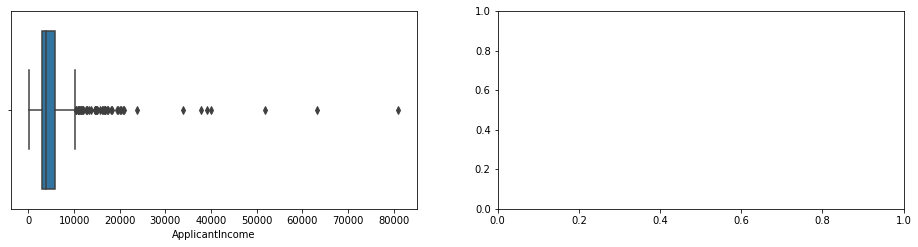

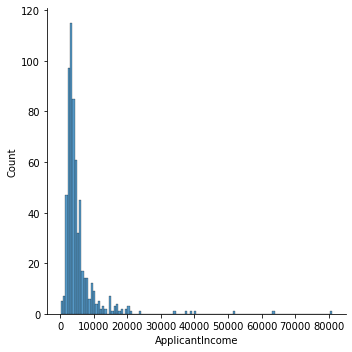

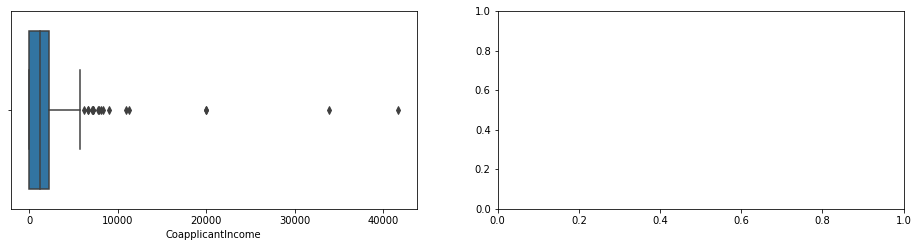

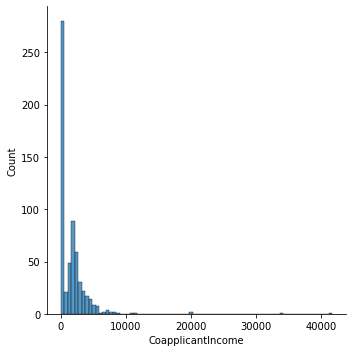

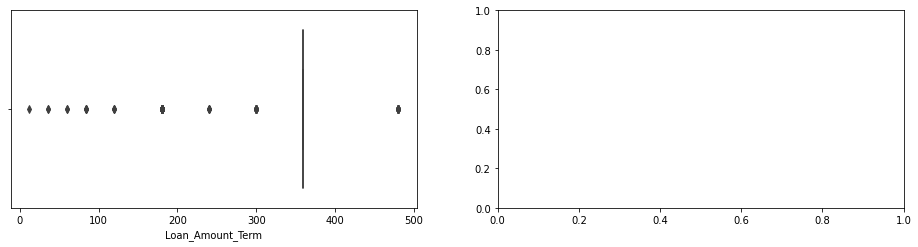

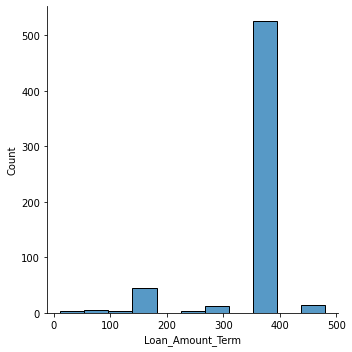

In [ ]:
cols = ['ApplicantIncome','CoapplicantIncome', 'Loan_Amount_Term']

for i in cols:
  plt.figure(figsize=(16,8))
  c=1
  d=2
  plt.subplot(2,2,c)
  sns.boxplot(loan_data[i])
  plt.subplot(2,2,d)
  sns.displot(loan_data[i])
  c=c+2
  d=d+1

The above code is creating a loop that iterates through a list of columns called 'cols' which contains the column names 'ApplicantIncome', 'CoapplicantIncome', and 'Loan_Amount_Term'. For each column, it creates a new figure with a size of 16x8 inches and creates two subplots within that figure.

The first subplot, using the 'c' variable, is a boxplot of the current column in the loop (i.e. 'ApplicantIncome', 'CoapplicantIncome', or 'Loan_Amount_Term') from the loan_data DataFrame. The second subplot, using the 'd' variable, is a histogram or probability density plot of the same column.

The c and d variables are used to keep track of the current subplot and increment by 2 and 1 respectively for each column in the loop.

Overall, this code is creating boxplots and histograms for the specified columns in the 'cols' list to visualize the distribution of the data in those columns.

There are some outliers

Find outliers count

In [ ]:
def outliers_shape(col_name):
  try:
      
      # Finding the IQR
      percentile25 = loan_data[col_name].quantile(0.25)
      percentile75 = loan_data[col_name].quantile(0.75)
      iqr = percentile75 - percentile25

      upper_limit = percentile75 + 1.5 * iqr
      lower_limit = percentile25 - 1.5 * iqr

      # Finding Outliers
      size = loan_data[loan_data[col_name]> upper_limit]

      print(size.shape)

  except Exception as e :
    print('error is : ', e)


This is a function called 'outliers_shape' that takes in one parameter, 'col_name', which represents the name of a column in the loan_data DataFrame.

The function first calculates the interquartile range (IQR) by finding the 25th and 75th percentiles of the data in the specified column and subtracting the 25th percentile from the 75th percentile. The IQR is used to identify outliers in the data.

Next, the function calculates the upper and lower limits for the data by adding and subtracting 1.5 times the IQR from the 75th and 25th percentiles respectively. Any data points above the upper limit or below the lower limit are considered outliers.

The function then uses the loan_data DataFrame to filter for any data points that fall outside of these limits and assigns the resulting dataframe to the variable 'size'. It then prints the shape of this dataframe.

This function can be used to identify and count the number of outliers in a specified column in the loan_data DataFrame by passing the name of the column as an argument to the function.

In [ ]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']
for i in cols:
  outliers_shape(i)

(50, 12)
(18, 12)
(41, 12)
(15, 12)
(0, 12)


This code is iterating through a list of column names called 'cols' which contains the names of the columns 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_term' and 'Credit_History'. For each column, the code calls the 'outliers_shape' function, passing in the current column name (i) as the argument.

The function will calculate the IQR and upper and lower limits for each column, then filter for any data points that fall outside of these limits and print the shape of the resulting dataframe. This will give a count of the number of outliers in each column.

This code helps to identify the number of outliers present in each column and will give a sense of how much the data is distributed and how much it is affected by the outliers.

Let's cap all

There are 50 rows are outliers, so we cap them instead of removing 

In [ ]:
def cap_outliers (col):
  percentile25 = loan_data[col].quantile(0.25)
  percentile75 = loan_data[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr

  loan_data[col] = np.where(
      loan_data[col] > upper_limit, upper_limit,
      np.where(
          loan_data[col] < lower_limit,
          lower_limit,
          loan_data[col]
      )
  )

This is a function called 'cap_outliers' that takes in one parameter 'col', which represents the name of a column in the 'df' DataFrame.

The function first calculates the interquartile range (IQR) by finding the 25th and 75th percentiles of the data in the specified column and subtracting the 25th percentile from the 75th percentile. The IQR is used to identify outliers in the data.

Next, the function calculates the upper and lower limits for the data by adding and subtracting 1.5 times the IQR from the 75th and 25th percentiles respectively. Any data points above the upper limit or below the lower limit are considered outliers.

The function then uses the numpy library's 'where' function to replace any data points that fall outside of these limits with the upper or lower limit. For example, if a data point in the specified column is above the upper limit, it will be replaced with the upper limit value. If a data point is below the lower limit, it will be replaced with the lower limit value. If a data point is within the limits, it will be left unchanged.

This function can be used to "cap" or limit the outliers in a specified column in the 'df' DataFrame by passing the name of the column as an argument to the function. It replaces the outliers with the upper and lower limit values which will help in the analysis as outliers can heavily affect the results.

In [ ]:
colss = ['ApplicantIncome','CoapplicantIncome','CoapplicantIncome','LoanAmount']
for i in colss:
    cap_outliers(i)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/

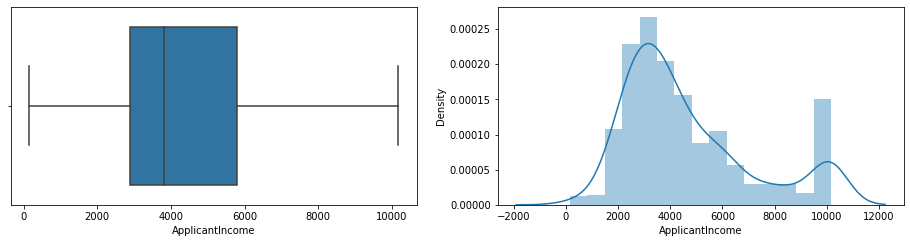

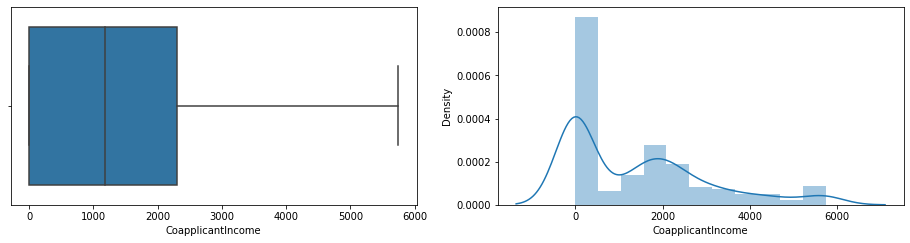

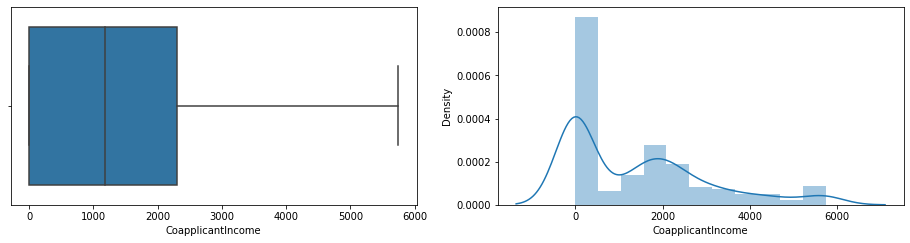

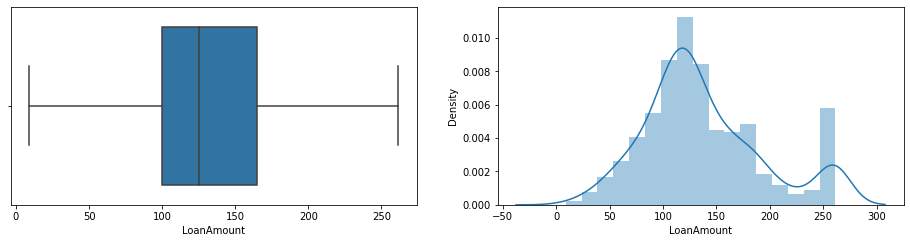

In [ ]:
for i in colss:
    plt.figure(figsize=(16,8))
    c=1
    d=2
    plt.subplot(2,2,c)
    sns.boxplot(loan_data[i])
    plt.subplot(2,2,d)
    sns.distplot(loan_data[i])
    c=c+2
    d=d+1

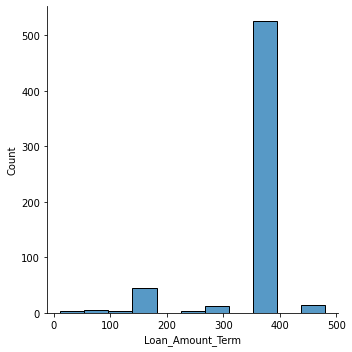

In [ ]:
sns.displot(loan_data.Loan_Amount_Term)

In [ ]:
loan_data.Loan_Amount_Term.unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

Here loan_amount_term is in months, convert this into years.

In [ ]:
loan_data.Loan_Amount_Term = loan_data.Loan_Amount_Term / 12
loan_data.sample(7)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
263,1,0,0,1,0,7200.00,0.000,120.0,30.0,1.0,1,1
183,0,1,1,1,0,10171.25,0.000,260.0,30.0,1.0,2,0
581,0,0,0,1,0,1836.00,5743.125,90.0,30.0,1.0,0,0
497,0,1,0,1,0,4625.00,2857.000,111.0,1.0,1.0,0,1
244,0,1,0,0,0,3406.00,4417.000,123.0,30.0,1.0,2,1
141,0,0,0,1,0,5417.00,0.000,168.0,30.0,1.0,0,1
83,0,1,0,1,0,6000.00,2250.000,261.5,30.0,1.0,2,0


In [ ]:
loan_data.Loan_Amount_Term.value_counts()

30.0    526
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
loan_data.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
# spliting '3+' and removing '+' in dependents column 
loan_data.Dependents = loan_data.Dependents.str.split('+').str[0]
loan_data.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


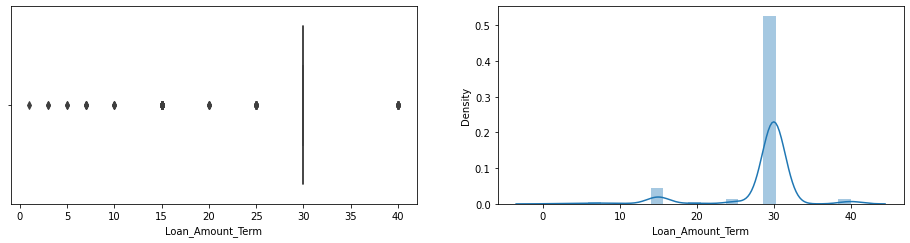

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(loan_data['Loan_Amount_Term'])

plt.subplot(2,2,2)
sns.distplot(loan_data['Loan_Amount_Term'])

In [ ]:
loan_data1=loan_data.copy()
loan_data1.head()
loan_data1.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
loan_data1.Dependents = loan_data1.Dependents.astype(int)
loan_data1.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

The above code is changing the data type of the 'Dependents' column in the 'loan_data1' DataFrame from an object data type to an integer data type.

The first line of code is using the 'astype' method to change the data type of the 'Dependents' column in the 'loan_data1' DataFrame to int. This is done by calling the 'astype' method on the 'Dependents' column of 'df1' and passing in the int data type as an argument.

The second line of code is calling the 'dtypes' attribute on the 'loan_data1' DataFrame to return the data types of all the columns in 'loan_data1'. This will confirm that the 'Dependents' column has been successfully changed to an integer data type.

In [ ]:
# train_test_split

X = loan_data1.drop(columns=('Loan_Status'))
Y = loan_data1['Loan_Status']

print(X)


     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0          0          1              0           5849.0   
1         0        1          1          1              0           4583.0   
2         0        1          0          1              1           3000.0   
3         0        1          0          0              0           2583.0   
4         0        0          0          1              0           6000.0   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0           2900.0   
610       0        1          3          1              0           4106.0   
611       0        1          1          1              0           8072.0   
612       0        1          2          1              0           7583.0   
613       1        0          0          1              1           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(Y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)
X_train.shape , X_test.shape


((491, 11), (123, 11))

In [ ]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
222,0,0,0,1,0,2971.00,2791.000,144.0,30.0,1.0,2
281,0,1,0,1,0,3927.00,800.000,112.0,30.0,1.0,2
372,0,1,2,1,1,9323.00,5743.125,261.5,25.0,1.0,1
32,0,0,1,1,1,4692.00,0.000,106.0,30.0,1.0,1
204,0,1,2,0,0,3917.00,0.000,124.0,30.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
534,1,0,0,0,1,10171.25,0.000,125.0,30.0,1.0,0
584,0,1,1,1,0,2787.00,1917.000,146.0,30.0,0.0,1
493,1,0,0,0,1,10171.25,0.000,225.0,30.0,1.0,2
527,0,1,1,0,0,5285.00,1430.000,161.0,30.0,0.0,2


In [ ]:
scaler = StandardScaler()
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
# fit the scaler to the train set, it will learn the parameters

scaler.fit(X_train[cols])

# transform train and test sets

X_train[cols] = scaler.transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

print(X_train[cols])

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
222        -0.671927           0.847354    0.133495          0.271532
281        -0.273383          -0.380376   -0.444084          0.271532
372         1.976145           2.667752    2.254294         -0.664719
32          0.045537          -0.873688   -0.552380          0.271532
204        -0.277551          -0.873688   -0.227492          0.271532
..               ...                ...         ...               ...
534         2.329770          -0.873688   -0.209442          0.271532
584        -0.748635           0.308411    0.169594          0.271532
493         2.329770          -0.873688    1.595493          0.271532
527         0.292751           0.008107    0.440334          0.271532
168        -0.977923          -0.873688   -1.328502          2.144033

[491 rows x 4 columns]


In [ ]:
print(X_test[cols])

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
414        -1.014609           1.122375    0.747173          0.271532
569        -0.590634           0.399057   -0.588479          0.271532
265        -0.203345           1.251870    0.259841          0.271532
84         -0.247952          -0.873688   -1.563144         -1.600969
109        -1.047127          -0.408742   -0.768972          2.144033
..               ...                ...         ...               ...
152         1.910693          -0.873688    1.938431          0.271532
589        -0.774065          -0.873688   -0.552380          0.271532
123        -0.677764          -0.873688   -1.003614          0.271532
3          -0.833680           0.580349   -0.299689          0.271532
557         2.316325          -0.873688    2.227220          0.271532

[123 rows x 4 columns]


In [ ]:
# train the model. using logistic regression classifier

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_train)

accuracy_score(Y_train, Y_pred)

0.8187372708757638